<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 18** | Regressão Logística I
Caderno de **exercício 01**<br>



## Discente: Samuel Saturno



Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

### Importando as Bibliotecas

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

%matplotlib inline

### Carregando o banco de dados

In [22]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [39]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
# Criando uma tabela de frequência cruzada para analisar a relação entre sexo e estado de saúde
tab_sex = (
    pd.crosstab(index=df['sex'],  # Variável sexo como índice
                columns=df['flag_doente'],  # Variável flag_doente como coluna
                margins=True,  # Adiciona totais nas margens da tabela
                margins_name='total')  # Nomeia os totais como 'total'
    .rename(index={0: 'female', 1: 'male'},  # Renomeando os índices para 'female' e 'male'
            columns={0: 'healthy', 1: 'sick'})  # Renomeando as colunas para 'healthy' e 'sick'
)

# Calculando a proporção de pessoas saudáveis por categoria de sexo
tab_sex['mean_healthy'] = tab_sex['healthy'] / tab_sex['total']

# Calculando a proporção de pessoas doentes por categoria de sexo
tab_sex['mean_sick'] = tab_sex['sick'] / tab_sex['total']

# Calculando a odds (razão de chances) de ficar doente em cada categoria de sexo
tab_sex['odds'] = tab_sex['sick'] / tab_sex['healthy']

# Calculando o odds ratio em relação à média de odds
tab_sex['odds_ratio'] = tab_sex['odds'] / tab_sex.loc['total', 'odds']

# Calculando o logito (logaritmo da odds) de ficar doente em cada categoria de sexo
tab_sex['logito'] = np.log(tab_sex['odds'])

# Calculando o Weight of Evidence (WOE) para avaliar a importância das categorias
tab_sex['WOE'] = np.log(tab_sex['odds'] / tab_sex.loc['total', 'odds'])

# Exibindo a tabela com as estatísticas calculadas
tab_sex


flag_doente,healthy,sick,total,mean_healthy,mean_sick,odds,odds_ratio,logito,WOE
sex,,,,,,,,,
female,72,25,97,0.742268,0.257732,0.347222,0.409672,-1.057790,-0.892398
male,92,114,206,0.446602,0.553398,1.239130,1.461996,0.214410,0.379802
total,164,139,303,0.541254,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [35]:
# Convertendo a coluna 'age' para valores numéricos, tratando erros com 'coerce'
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Removendo linhas com valores de idade ausentes após a conversão
df = df.dropna(subset=['age'])

# Criando a tabela tab_age usando crosstab para contar o número de ocorrências de 'flag_doente' por idade
tab_age = (pd.crosstab(index=df['age'],
                       columns=df['flag_doente'],
                       margins=True,
                       margins_name='total')
             .rename(columns={0:'healthy',
                              1:'sick'})
             .groupby(by=pd.qcut(x=df['age'], q=5))  # Agrupando por quintis da idade
             .agg(func='sum'))  # Agregando a soma dos valores

# Adicionando uma linha na tabela tab_age com a soma total de 'healthy', 'sick' e 'total'
tab_age = (pd.concat(objs=[tab_age,
                           pd.DataFrame(data=tab_age.sum(axis=0),
                                        columns=['total']).T]))
tab_age.index.name = 'age'  # Definindo o nome do índice como 'age'

# Calculando as proporções de 'healthy' e 'sick' em relação ao total
tab_age['mean_healthy'] = tab_age['healthy'] / tab_age['total']
tab_age['mean_sick'] = tab_age['sick'] / tab_age['total']

# Calculando a proporção de 'sick' em relação a 'healthy' e o odds ratio
tab_age['odds'] = tab_age['sick'] / tab_age['healthy']
tab_age['odds_ratio'] = tab_age['odds'] / tab_age.loc['total', 'odds']

# Calculando o logito e o WOE (Weight of Evidence)
tab_age['logito'] = np.log(tab_age['odds'])
tab_age['WOE'] = np.log(tab_age['odds'] / tab_age.loc['total', 'odds'])

# Calculando a média da idade por quintis
tab_age['mean_age'] = df['age'].groupby(by=pd.qcut(x=df['age'], q=5)).mean()
tab_age.loc['total', 'mean_age'] = df['age'].mean()  # Adicionando a média total da idade
tab_age['mean_age'] = round(tab_age['mean_age'])  # Arredondando a média da idade

tab_age  # Mostrando a tabela final tab_age


flag_doente,healthy,sick,total,mean_healthy,mean_sick,odds,odds_ratio,logito,WOE,mean_age
age,,,,,,,,,,
"(28.999, 45.0]",41,22,63,0.650794,0.349206,0.536585,0.633094,-0.622530,-0.457137,41.0
"(45.0, 53.0]",26,40,66,0.393939,0.606061,1.538462,1.815163,0.430783,0.596175,50.0
"(53.0, 58.0]",35,43,78,0.448718,0.551282,1.228571,1.449538,0.205852,0.371245,56.0
"(58.0, 62.0]",37,22,59,0.627119,0.372881,0.594595,0.701536,-0.519875,-0.354483,60.0
"(62.0, 77.0]",25,12,37,0.675676,0.324324,0.480000,0.566331,-0.733969,-0.568577,67.0
total,164,139,303,0.541254,0.458746,0.847561,1.000000,-0.165392,0.000000,54.0


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

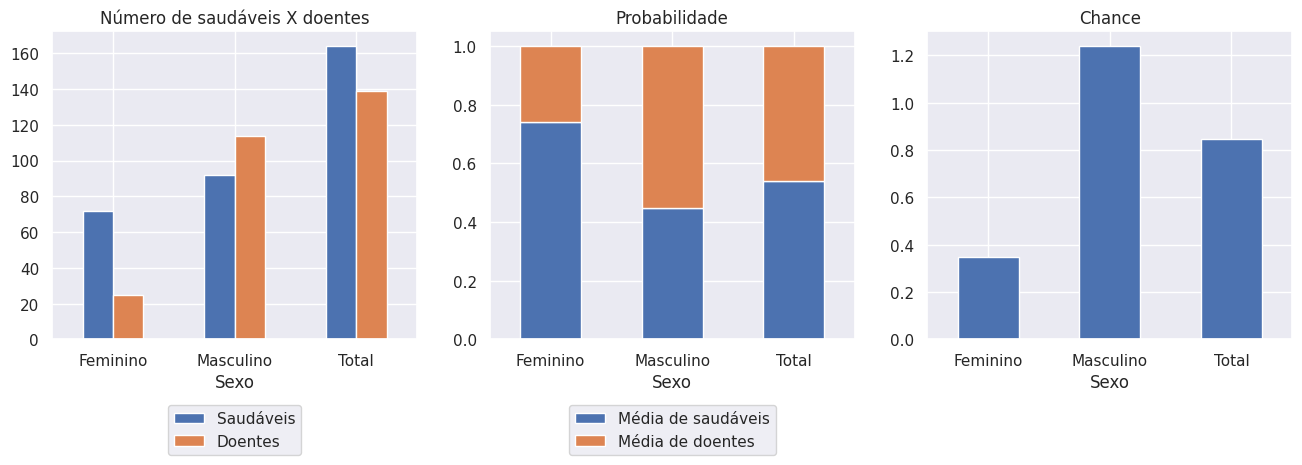

In [36]:
# Define o tema de visualização do seaborn
sns.set_theme()

# Cria uma figura com 1 linha e 3 colunas para os subplots, definindo o tamanho da figura
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

# Plotagem do primeiro subplot (ax0) com um gráfico de barras para 'healthy' e 'sick'
ax0 = tab_sex[['healthy', 'sick']].plot.bar(ax=axes[0])
ax0.set_title(label='Número de saudáveis X doentes')  # Define o título do gráfico
ax0.set_xlabel(xlabel='Sexo')  # Define o rótulo do eixo x
ax0.set_xticklabels(labels=['Feminino', 'Masculino', 'Total'], rotation=0)  # Define os rótulos do eixo x
ax0.legend(labels=['Saudáveis', 'Doentes'], loc=8, bbox_to_anchor=(0.5, -.4))  # Adiciona a legenda ao gráfico

# Plotagem do segundo subplot (ax1) com um gráfico de barras empilhadas para 'mean_healthy' e 'mean_sick'
ax1 = tab_sex[['mean_healthy', 'mean_sick']].plot.bar(ax=axes[1], stacked=True)
ax1.set_title(label='Probabilidade')  # Define o título do gráfico
ax1.set_xlabel(xlabel='Sexo')  # Define o rótulo do eixo x
ax1.set_xticklabels(labels=['Feminino', 'Masculino', 'Total'], rotation=0)  # Define os rótulos do eixo x
ax1.legend(labels=['Média de saudáveis', 'Média de doentes'], loc=8, bbox_to_anchor=(0.5, -.4))  # Adiciona a legenda

# Plotagem do terceiro subplot (ax2) com um gráfico de barras para 'odds'
ax2 = tab_sex['odds'].plot.bar(ax=axes[2])
ax2.set_title(label='Chance')  # Define o título do gráfico
ax2.set_xlabel(xlabel='Sexo')  # Define o rótulo do eixo x
ax2.set_xticklabels(labels=['Feminino', 'Masculino', 'Total'], rotation=0)  # Define os rótulos do eixo x

# Exibe a figura com os subplots
plt.show()


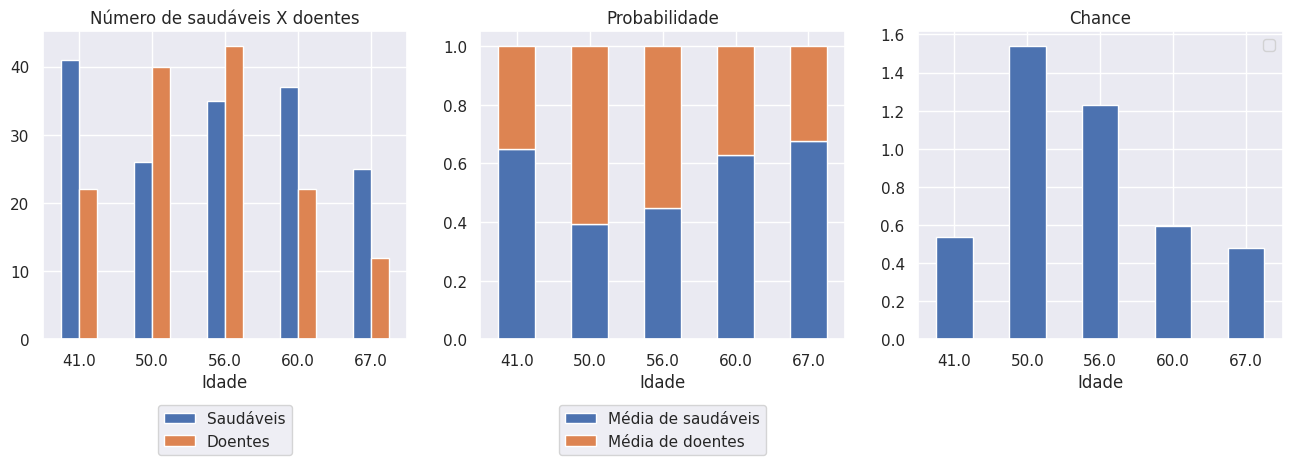

In [37]:
# Cria uma figura com 1 linha e 3 colunas para os subplots, definindo o tamanho da figura
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

# Plotagem do primeiro subplot (ax0) com um gráfico de barras para 'healthy' e 'sick' em relação à idade média
ax0 = tab_age.iloc[:-1,].plot.bar(x='mean_age', y=['healthy', 'sick'], ax=axes[0])
ax0.set_title(label='Número de saudáveis X doentes')  # Define o título do gráfico
ax0.set_xlabel(xlabel='Idade')  # Define o rótulo do eixo x
ax0.set_xticklabels(labels=ax0.get_xticklabels(), rotation=0)  # Define os rótulos do eixo x
ax0.legend(labels=['Saudáveis', 'Doentes'], loc=8, bbox_to_anchor=(0.5, -.4))  # Adiciona a legenda ao gráfico

# Plotagem do segundo subplot (ax1) com um gráfico de barras empilhadas para 'mean_healthy' e 'mean_sick' em relação à idade média
ax1 = tab_age.iloc[:-1].plot.bar(y=['mean_healthy', 'mean_sick'], ax=axes[1], stacked=True)
ax1.set_title(label='Probabilidade')  # Define o título do gráfico
ax1.set_xlabel(xlabel='Idade')  # Define o rótulo do eixo x
ax1.set_xticklabels(labels=ax0.get_xticklabels(), rotation=0)  # Define os rótulos do eixo x
ax1.legend(labels=['Média de saudáveis', 'Média de doentes'], loc=8, bbox_to_anchor=(0.5, -.4))  # Adiciona a legenda

# Plotagem do terceiro subplot (ax2) com um gráfico de barras para 'odds' em relação à idade média
ax2 = tab_age.iloc[:-1].plot.bar(y='odds', ax=axes[2])
ax2.set_title(label='Chance')  # Define o título do gráfico
ax2.set_xlabel(xlabel='Idade')  # Define o rótulo do eixo x
ax2.set_xticklabels(labels=ax0.get_xticklabels(), rotation=0)  # Define os rótulos do eixo x
ax2.legend(labels='')  # Remove a legenda

# Exibe a figura com os subplots
plt.show()


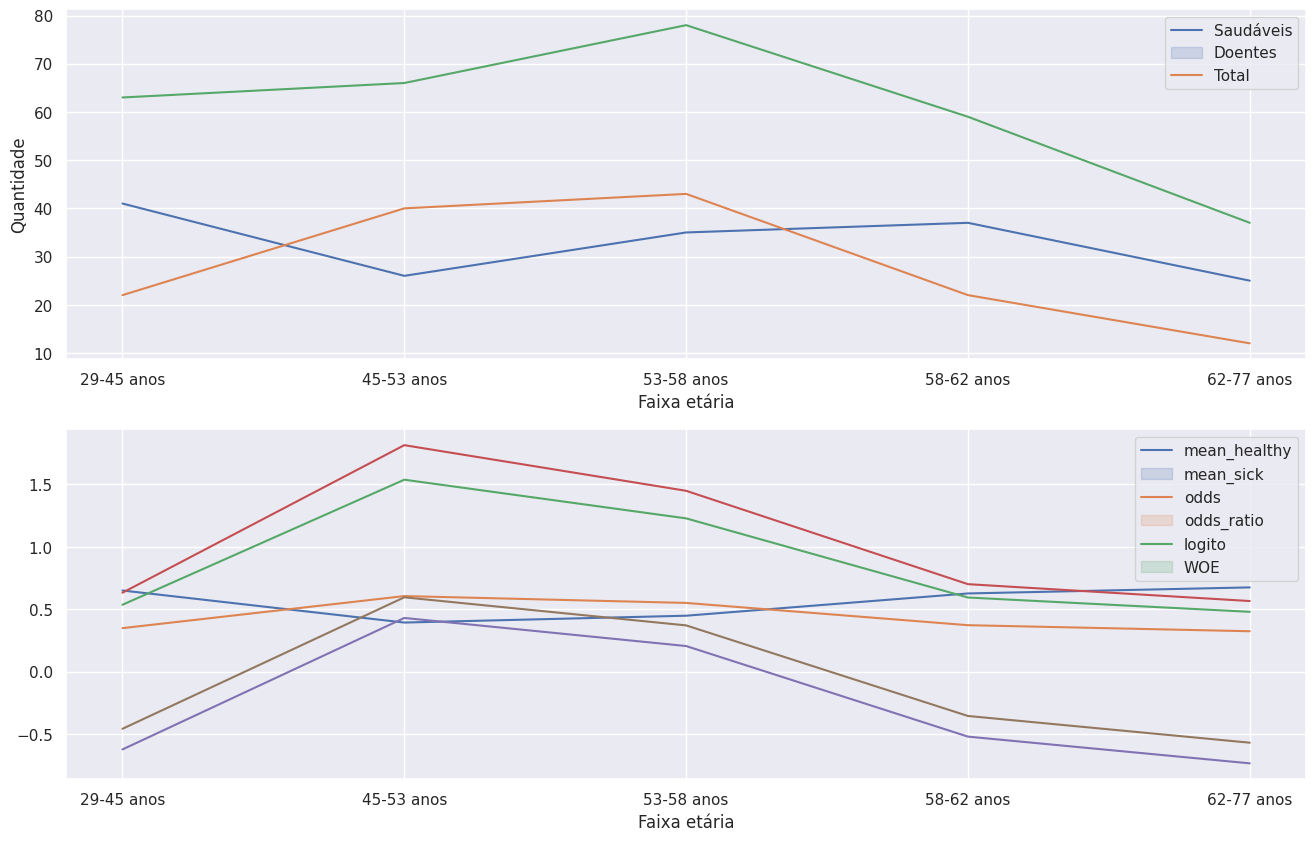

In [38]:
# Cria uma figura com 2 linhas e 1 coluna para os subplots, definindo o tamanho da figura
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))

# Define rótulos para as faixas etárias
age_labels = ['29-45 anos', '45-53 anos', '53-58 anos', '58-62 anos', '62-77 anos']

# Loop para plotar as linhas para 'healthy', 'sick' e 'total' no primeiro subplot (axes[0])
for col in tab_age.iloc[:-1, :3]:
    sns.lineplot(x=tab_age.iloc[:-1].index.astype(str),  # Define o eixo x como o índice convertido para string
                 y=tab_age.iloc[:-1][col],  # Define o eixo y como os valores da coluna atual
                 ax=axes[0])  # Define o subplot a ser usado
axes[0].legend(labels=['Saudáveis', 'Doentes', 'Total'])  # Adiciona a legenda ao subplot
axes[0].set_xlabel(xlabel='Faixa etária')  # Define o rótulo do eixo x
axes[0].set_ylabel(ylabel='Quantidade')  # Define o rótulo do eixo y
axes[0].set_xticks(range(len(age_labels)))  # Define os ticks do eixo x
axes[0].set_xticklabels(labels=age_labels)  # Define os rótulos do eixo x

# Loop para plotar as linhas para 'mean_healthy', 'mean_sick' e 'odds' no segundo subplot (axes[1])
for col in tab_age.iloc[:-1, 3:-1]:
    sns.lineplot(x=tab_age.iloc[:-1].index.astype(str),  # Define o eixo x como o índice convertido para string
                 y=tab_age.iloc[:-1][col],  # Define o eixo y como os valores da coluna atual
                 ax=axes[1])  # Define o subplot a ser usado
axes[1].legend(labels=tab_age.iloc[:-1, 3:-1].columns)  # Adiciona a legenda ao subplot
axes[1].set_xlabel(xlabel='Faixa etária')  # Define o rótulo do eixo x
axes[1].set_ylabel(ylabel='')  # Define o rótulo do eixo y (vazio para economizar espaço)
axes[1].set_xticks(range(len(age_labels)))  # Define os ticks do eixo x
axes[1].set_xticklabels(labels=age_labels)  # Define os rótulos do eixo x

# Exibe a figura com os subplots
plt.show()


### Insight

* Probabilidade de estar doente por faixa etária:

A faixa etária de 45 a 53 anos apresenta a maior probabilidade de estar doente (60.61%), seguida pela faixa de 53 a 58 anos (55.13%). Isso indica que pessoas nessa faixa etária têm uma maior chance de estar doente em relação às outras faixas etárias analisadas.

* Odds Ratio por faixa etária:

O Odds Ratio é uma medida de associação entre exposição e resultado. Aqui, ele indica o quão mais provável é estar doente em comparação com estar saudável.
A faixa etária de 45 a 53 anos tem um Odds Ratio de 1.82, o que indica que as pessoas nessa faixa etária têm quase duas vezes mais chances de estar doente do que de estar saudável em comparação com a população total.

* Idade média das faixas etárias:

A idade média de cada faixa etária também é apresentada. Por exemplo, a faixa de 45 a 53 anos tem uma idade média de 50 anos.

* Análise de WOE (Weight of Evidence):

O WOE é uma técnica usada em modelagem estatística para transformar variáveis categóricas em numéricas, mantendo a relação com a variável dependente.
Valores positivos de WOE indicam uma relação mais forte com a variável dependente (estar doente neste caso), enquanto valores negativos indicam uma relação mais forte com a não ocorrência da variável dependente (estar saudável neste caso).
Por exemplo, a faixa etária de 62 a 77 anos tem um WOE negativo de -0.569, indicando uma relação mais forte com a não ocorrência de estar doente.

* Distribuição de Saúde por Idade:

O gráfico de linhas podemos visualizar a distribuição da saúde (saudável e doente) ao longo das diferentes faixas etárias, permitindo uma análise mais visual das tendências.








